In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from pickle import dump, load

In [197]:
orig_df = pd.read_csv('heart_2020_cleaned.csv')
display(orig_df.head())
orig_df.shape


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


(319795, 18)

In [198]:
orig_df[['AgeCategory', 'Sex']].groupby('AgeCategory', observed=True).head()

,AgeCategory,Sex
0,55-59,Female
1,80 or older,Female
2,65-69,Male
3,75-79,Female
4,40-44,Female
...,...,...
773,30-34,Male
828,18-24,Female
881,30-34,Female
1104,25-29,Male


In [199]:
df = orig_df.copy()

target = 'HeartDisease'
categorical_features = []
numeric_features = []

# Get all column names
features = df.columns.to_numpy().tolist()

# Separate categorical and numeric features
for col in features:
    if df[col].dtype != 'object': 
        if col != target:
            numeric_features.append(col)
    else:
        categorical_features.append(col)
        
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(list(df[col].astype(str).values))

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


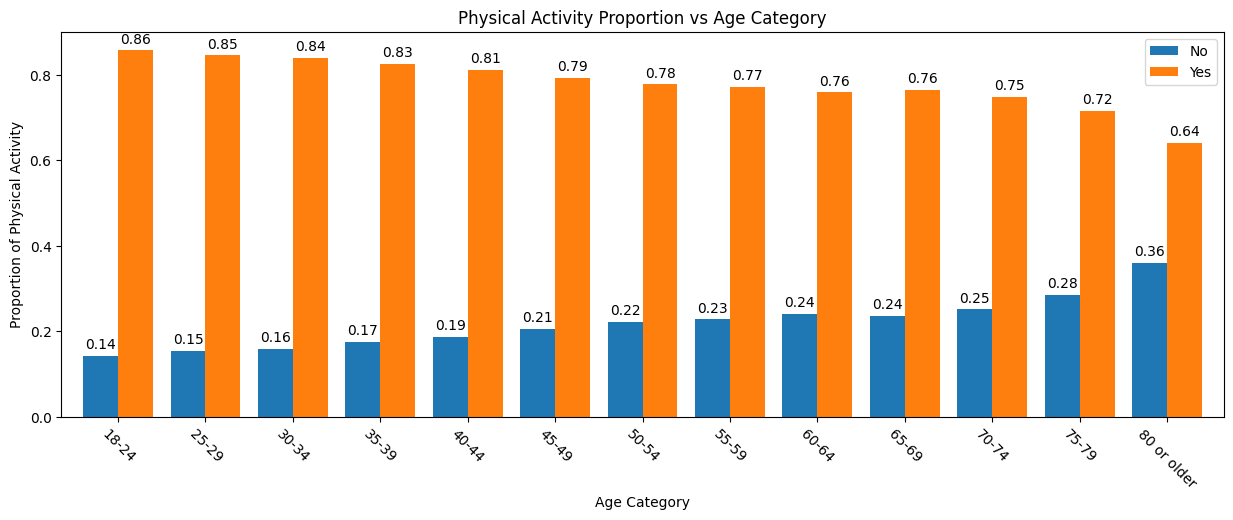

In [234]:
temp_df = pd.concat([orig_df['AgeCategory'], df['PhysicalActivity']], axis=1)
age_heartdisease = temp_df.groupby('AgeCategory', observed=True).value_counts().unstack()

age_heartdisease = age_heartdisease.div(age_heartdisease.sum(axis=1), axis=0).set_axis(['No', 'Yes'], axis=1)

ax = age_heartdisease.plot(kind='bar', figsize=(15, 5), width=0.8)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f', padding=3)

plt.xticks(rotation=-45)
plt.xlabel('Age Category')
plt.ylabel('Proportion of Physical Activity')
plt.title('Physical Activity Proportion vs Age Category')
plt.show()

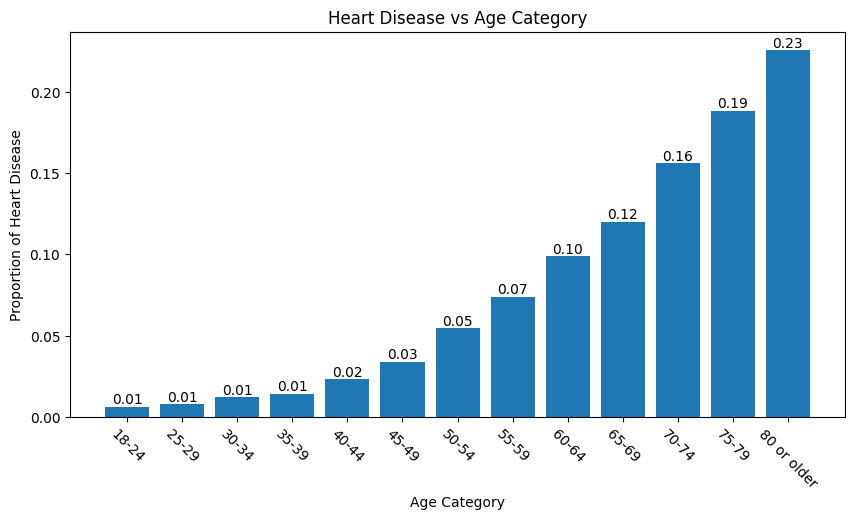

In [201]:
temp_df = pd.concat([orig_df['AgeCategory'], df[target]], axis=1)
age_heartdisease = temp_df.groupby('AgeCategory').mean()

plt.figure(figsize=(10, 5))
bar = plt.bar(age_heartdisease.index, age_heartdisease['HeartDisease'])
plt.xticks(rotation=-45)
plt.xlabel('Age Category')
plt.ylabel('Proportion of Heart Disease')
plt.title('Heart Disease vs Age Category')
plt.bar_label(bar, fmt='%.2f')
plt.show()

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

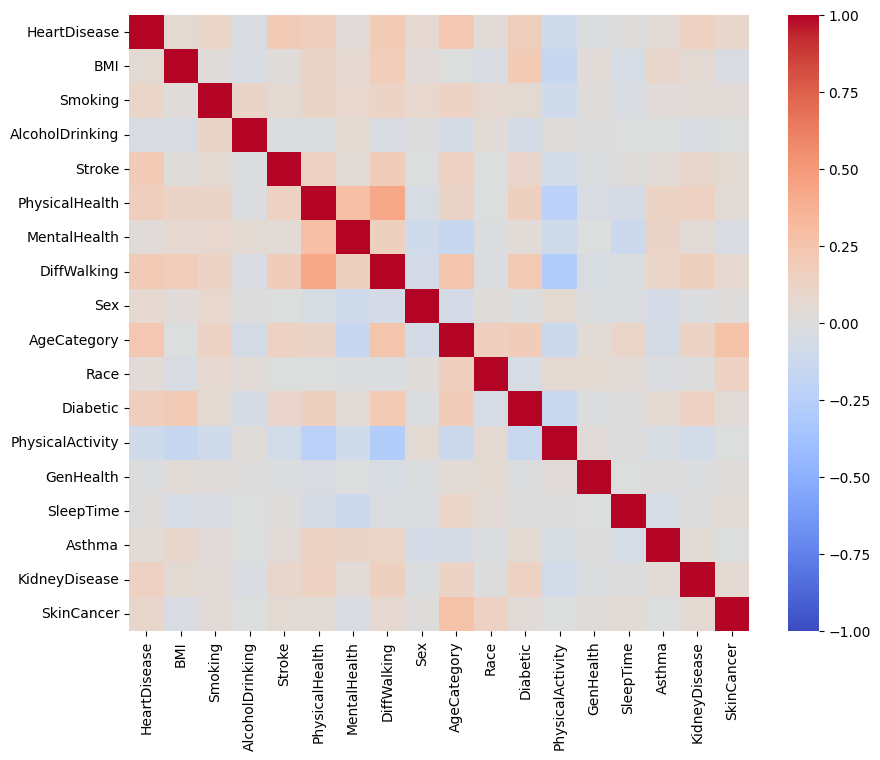

In [202]:
heart_disease_corr = df.corr(numeric_only=True).iloc[0].sort_values(ascending=False)
display(heart_disease_corr)

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [203]:
# Skewness does not matter much here

# from scipy.stats import skew
# skewed_feats = df[numeric_features].apply(lambda x: skew(x)) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats = skewed_feats.index
# df[skewed_feats] = np.log1p(df[skewed_feats])
# df

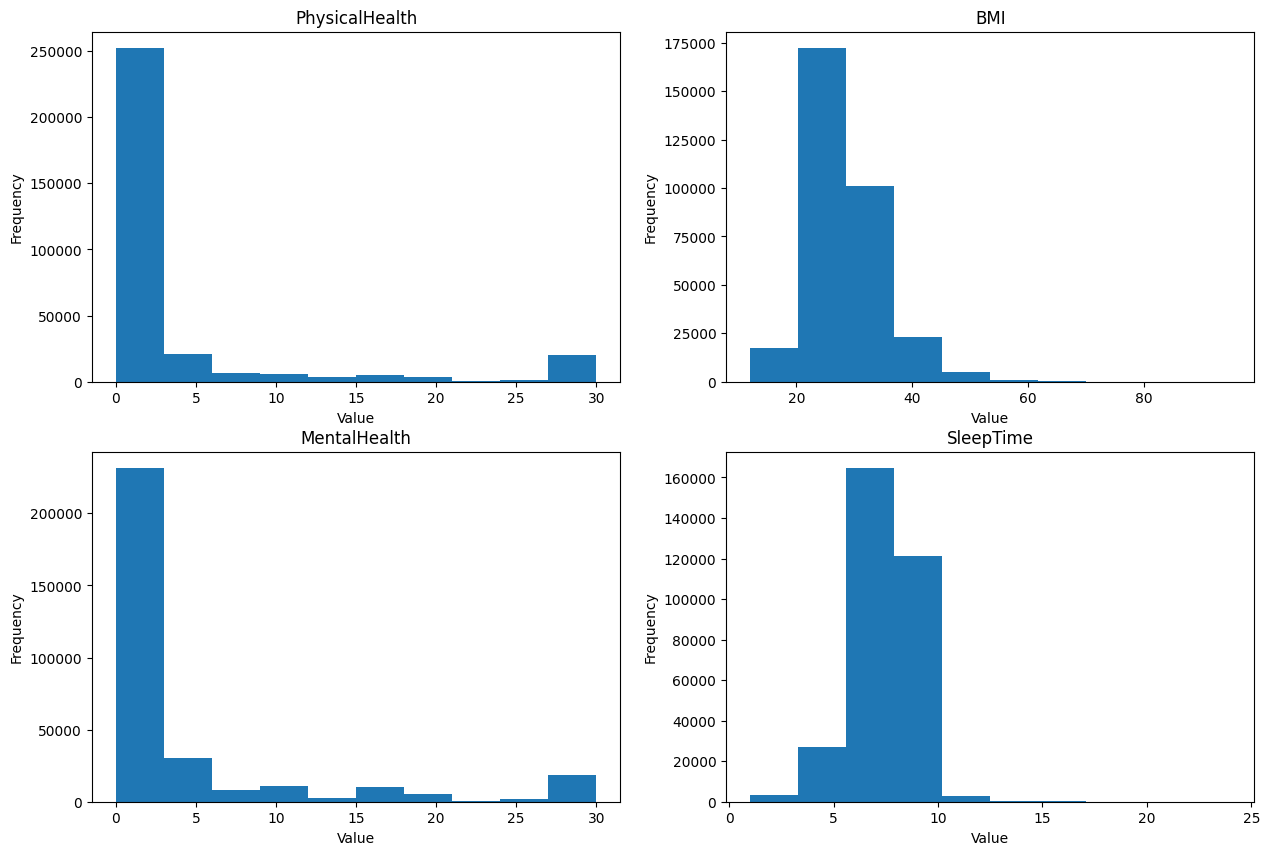

In [204]:
hdc_filtered = df.corr(numeric_only=True).iloc[0].sort_values(ascending=False).index.tolist()
hdc_filtered = [i for i in hdc_filtered if i in numeric_features]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for row in range(2):
    for col in range(2):
        ax[row, col].hist(df[hdc_filtered[row*2+col]])
        ax[row, col].set_title(hdc_filtered[row*2+col])
        ax[row, col].set_xlabel('Value')
        ax[row, col].set_ylabel('Frequency')

plt.show()



In [205]:
X = sm.add_constant(df.drop(target, axis=1))
Y = df[target]

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     2840.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:32:19   Log-Likelihood:                -23929.
No. Observations:              319795   AIC:                         4.789e+04
Df Residuals:                  319777   BIC:                         4.809e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0711      0.004    -18.151      0.000      -0.079      -0.063
BMI               4.687e-05    7.6e-05      0.617      0.537      -0.000       0.000
Smoking              0.0258      0.001     26.641      0.000       0.024       0.028
AlcoholDrinking     -0.0172      0.002     -9.267      0.000      -0.021      -0.014
Stroke               0.1924      0.002     77.401      0.000       0.188       0.197
PhysicalHealth       0.0024   6.75e-05     35.162      0.000       0.002       0.003
MentalHealth         0.0005    6.3e-05      7.632      0.000       0.000       0.001
DiffWalking          0.0579      0.002     36.639      0.000       0.055       0.061
Sex                  0.0504      0.001     53.523      0.000       0.049       0.052
AgeCategory          0.0124      0.000     83.688      0.000       0.012       0.013
Race                 0.0021      0.000      5.362      0.000       0.001       0.003
Diabetic             0.0321      0.001     46.886      0.000       0.031       0.033
PhysicalActivity    -0.0100      0.001     -8.485      0.000      -0.012      -0.008
GenHealth           -0.0019      0.000     -6.285      0.000      -0.002      -0.001
SleepTime        -7.526e-05      0.000     -0.231      0.817      -0.001       0.001
Asthma               0.0215      0.001     15.549      0.000       0.019       0.024
KidneyDisease        0.1123      0.003     44.664      0.000       0.107       0.117
SkinCancer           0.0261      0.002     15.765      0.000       0.023       0.029
==============================================================================
Omnibus:                   154212.278   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           725946.424
Skew:                           2.425   Prob(JB):                         0.00
Kurtosis:                       8.564   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
def test_gate(df: pd.DataFrame, start, stop, step):
    gates, rsquared = [], []
    for gate in np.arange(start, stop, step):
        heart_disease_corr = df.corr(numeric_only=True).iloc[0].sort_values(ascending=False)
        keep_cols = heart_disease_corr[(heart_disease_corr > gate) | (heart_disease_corr < -gate)].drop(target, axis=0).index.to_numpy().tolist()
        X = sm.add_constant(df[keep_cols])
        Y = df[target]

        model = sm.OLS(Y, X).fit().rsquared
        
        gates.append(gate)
        rsquared.append(model)
    
    return gates, rsquared

# tg = test_gate(df, 0, 0.25, 0.01)

# dump(tg, open('tg.pkl', 'wb'))


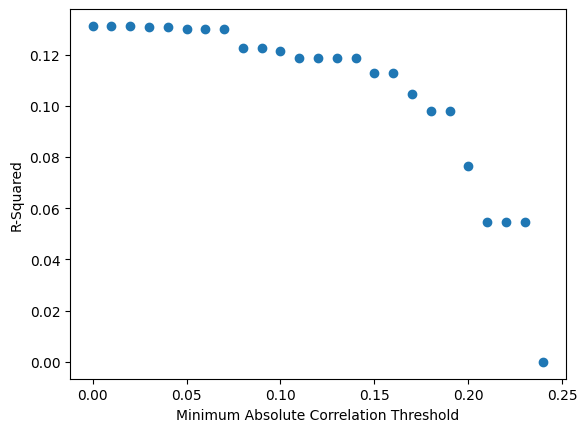

In [207]:
tg = load(open('tg.pkl', 'rb'))

plt.scatter(tg[0], tg[1])
plt.xlabel('Minimum Absolute Correlation Threshold')
plt.ylabel('R-Squared')
plt.show()

In [208]:
print(max(tg[1]))


0.13117995392323178
